# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(mouse_metadata,study_results,on=["Mouse ID"])

# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_data['Mouse ID'].unique())


249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
reduced_data=combined_data[['Mouse ID','Timepoint']]
duplicated_MouseID_df=reduced_data[reduced_data.duplicated(subset=['Mouse ID','Timepoint'],keep=False)]
duplicate_mouseID=duplicated_MouseID_df['Mouse ID'].unique()
duplicate_mouseID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouseID_data=combined_data.loc[combined_data['Mouse ID']=='g989',:]
duplicate_mouseID_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data.loc[combined_data['Mouse ID']!='g989',:]
clean_data_df=clean_df.sort_values('Mouse ID').reset_index(drop=True)
clean_data_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,25,56.793208,1
1,a203,Infubinol,Female,20,23,40,63.593490,2
2,a203,Infubinol,Female,20,23,20,55.173336,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,10,51.852437,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,20,57.898778,2
1876,z969,Naftisol,Male,9,30,25,63.145652,2
1877,z969,Naftisol,Male,9,30,30,65.841013,3
1878,z969,Naftisol,Male,9,30,35,69.176246,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_data_df['Mouse ID'].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df=clean_data_df[["Drug Regimen",'Tumor Volume (mm3)']]
regimen_grouped_df=regimen_df.groupby('Drug Regimen')
mean_df=regimen_grouped_df.mean().rename(columns={"Tumor Volume (mm3)":"tumor volume mean"})
median_df=regimen_grouped_df.median().rename(columns={"Tumor Volume (mm3)":"tumor volume median"})
variance_df=regimen_grouped_df.var().rename(columns={"Tumor Volume (mm3)":"tumor volume variance"})
stdevation_df=regimen_grouped_df.std().rename(columns={"Tumor Volume (mm3)":"tumor volume SD"})
sem_df=regimen_grouped_df.sem().rename(columns={"Tumor Volume (mm3)":"tumor volume SEM"})
summary_df=pd.merge(mean_df,median_df,on='Drug Regimen').merge(variance_df,on="Drug Regimen").merge(stdevation_df,on="Drug Regimen").merge(sem_df,on='Drug Regimen')
summary_df

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,tumor volume mean,tumor volume median,tumor volume variance,tumor volume SD,tumor volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary=regimen_df
summary_stats=summary.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']}).reset_index()
summary_stats.set_index('Drug Regimen')


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

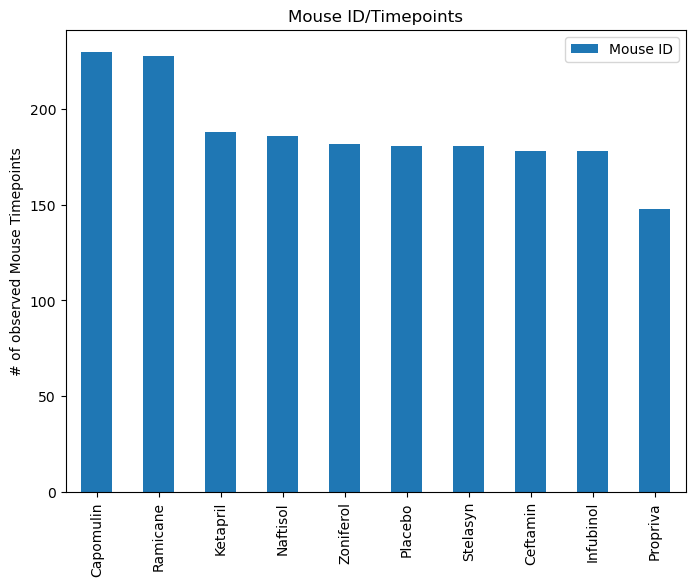

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
clean_data_groupby_ID_Timepoints=clean_data_df.groupby('Drug Regimen')
data_count=clean_data_groupby_ID_Timepoints.count().reset_index()
df1=data_count.sort_values('Mouse ID',ascending=False)
plot=df1[["Drug Regimen","Mouse ID"]].plot(kind="bar",figsize=(8,6))
plt.ylabel('# of observed Mouse Timepoints')
plot.set_xticklabels(df1["Drug Regimen"], rotation=90)
plt.title('Mouse ID/Timepoints')
plt.show()

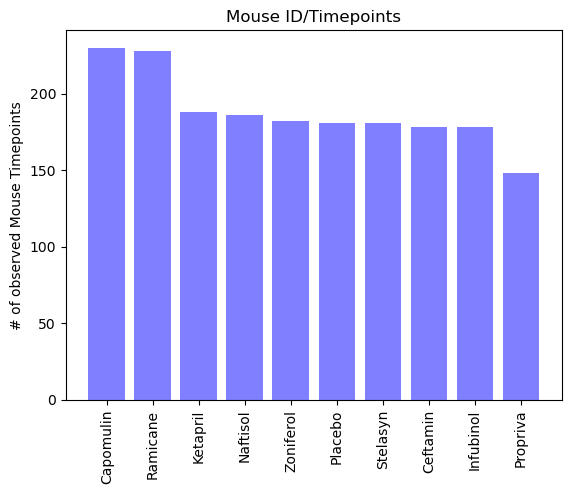

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
clean_data_groupby_ID_Timepoints=clean_data_df.groupby('Drug Regimen')
data_count=clean_data_groupby_ID_Timepoints.count().reset_index()
df=data_count.sort_values('Mouse ID',ascending=False)
x_axis=np.arange(len(data_count['Drug Regimen']))
tick_locations=[value for value in x_axis]
plt.bar(x_axis,df['Mouse ID'] , color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, df["Drug Regimen"], rotation="vertical")
plt.ylabel('# of observed Mouse Timepoints')
plt.title('Mouse ID/Timepoints')
plt.show()

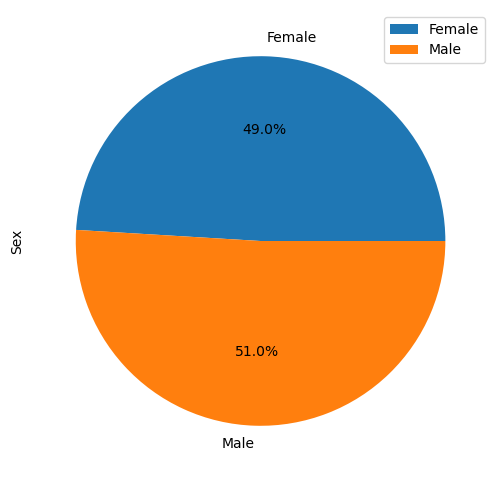

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_data_groupby_ID_Timepoints=clean_data_df.groupby('Sex')
data_count=clean_data_groupby_ID_Timepoints.count().reset_index()
df2=data_count[["Sex","Mouse ID"]].set_index('Sex')
plot=df2.plot.pie(y='Mouse ID',autopct='%1.1f%%',figsize=(8,6))
plt.ylabel('Sex')
plt.show()

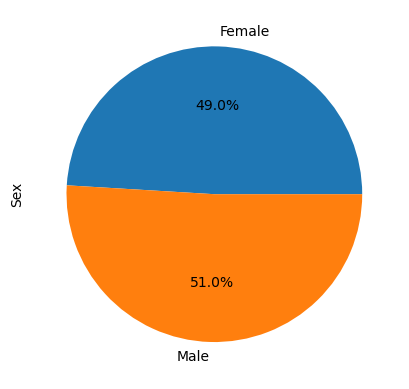

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sizes=data_count['Mouse ID']
labels=data_count['Sex']
plt.pie(sizes,labels=labels,
        autopct="%1.1f%%")
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [28]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
reduced_clean_data=clean_data_df[['Drug Regimen','Timepoint']]
regimens=reduced_clean_data.groupby('Drug Regimen').max().reset_index()
four_regimens=regimens.loc[(regimens['Drug Regimen']=='Capomulin')|(regimens['Drug Regimen']=='Ramicane')\
    |(regimens['Drug Regimen']=='Infubinol')|(regimens['Drug Regimen']=='Ceftamin'),:]
four_regimens

#Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_tumervolume=pd.merge(clean_data_df,four_regimens,on=['Drug Regimen','Timepoint'],how='inner')
last_timepoint_tumervolume

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a685,Infubinol,Male,8,30,45,66.083066,3
3,c139,Infubinol,Male,11,28,45,72.226731,2
4,e476,Infubinol,Male,23,26,45,62.435404,1
...,...,...,...,...,...,...,...,...
58,u364,Capomulin,Male,18,17,45,31.023923,3
59,v923,Capomulin,Female,19,21,45,40.658124,2
60,w914,Capomulin,Male,24,21,45,36.041047,2
61,x401,Capomulin,Female,16,15,45,28.484033,0


In [32]:
# Put treatments into a list for for loop (and later for plot labels)
regimens_list=['Capomulin','Ramicane','Infubinol','Ceftamin']
tumor_volume=clean_data_df[['Drug Regimen','Tumor Volume (mm3)']]
# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_list=[]
tumor_volume_list=[(tumor_volume.loc[tumor_volume['Drug Regimen']==regimen,['Tumor Volume (mm3)']]) for regimen in regimens_list]
tumor_volume_list


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
   
    

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds
for x in range(len(regimens_list)):
    quartiles = tumor_volume_list[x].quantile([.25,.5,.75])
    lowerq=quartiles.iloc[0]
    upperq=quartiles.iloc[2]
    iqr=upperq-lowerq
    lower_bound = lowerq - (1.5*iqr) 
    upper_bound = upperq + (1.5*iqr)
    print(f'lower boundary of {regimens_list[x]} {lower_bound}\n and upper boundary of {regimens_list[x]} {upper_bound}')



lower boundary of Capomulin Tumor Volume (mm3)    26.714832
dtype: float64
 and upper boundary of Capomulin Tumor Volume (mm3)    55.971101
dtype: float64
lower boundary of Ramicane Tumor Volume (mm3)    24.186586
dtype: float64
 and upper boundary of Ramicane Tumor Volume (mm3)    57.488048
dtype: float64
lower boundary of Infubinol Tumor Volume (mm3)    32.309217
dtype: float64
 and upper boundary of Infubinol Tumor Volume (mm3)    72.31758
dtype: float64
lower boundary of Ceftamin Tumor Volume (mm3)    32.818911
dtype: float64
 and upper boundary of Ceftamin Tumor Volume (mm3)    71.190953
dtype: float64


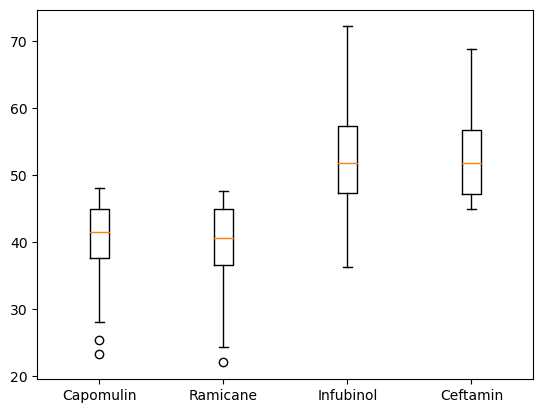

In [33]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig1, ax1 = plt.subplots()
for i,lst in enumerate(tumor_volume_list): 
    ax1.boxplot(lst,positions=[i]) 
ax1.set_xticklabels(regimens_list)
plt.show()

## Line and Scatter Plots

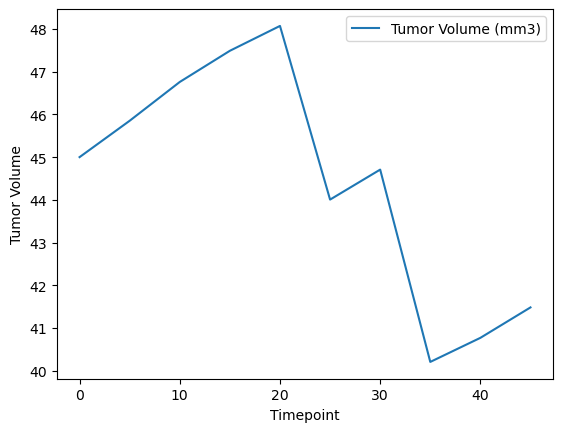

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
l509=clean_data_df.loc[(clean_data_df['Mouse ID']=='l509')&(clean_data_df['Drug Regimen']=='Capomulin'),['Timepoint','Tumor Volume (mm3)']]
l509_capomulin=l509.set_index('Timepoint').sort_index().reset_index()
l509_capomulin.plot('Timepoint','Tumor Volume (mm3)')
plt.ylabel('Tumor Volume')
plt.show()

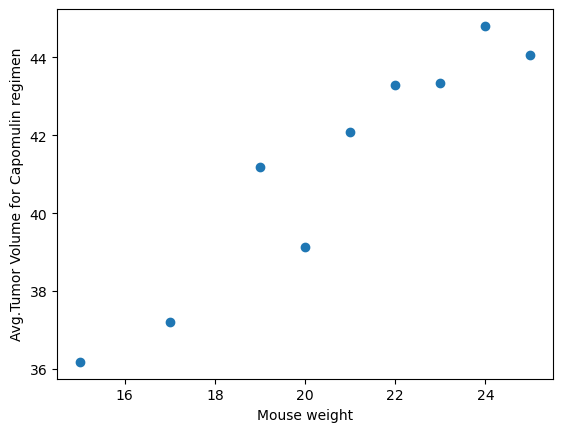

In [19]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df=clean_data_df.loc[clean_data_df['Drug Regimen']=='Capomulin',["Weight (g)","Tumor Volume (mm3)"]]
capomulin_group_by_weight=capomulin_df.groupby(['Weight (g)']).mean()
capomulin=capomulin_group_by_weight.reset_index()
plt.scatter(capomulin.iloc[:,0],capomulin.iloc[:,1])
plt.xlabel('Mouse weight')
plt.ylabel('Avg.Tumor Volume for Capomulin regimen')
plt.show()


## Correlation and Regression

The correlation between both factors is 0.95


Text(20, 37, 'y = 0.89x + 22.76')

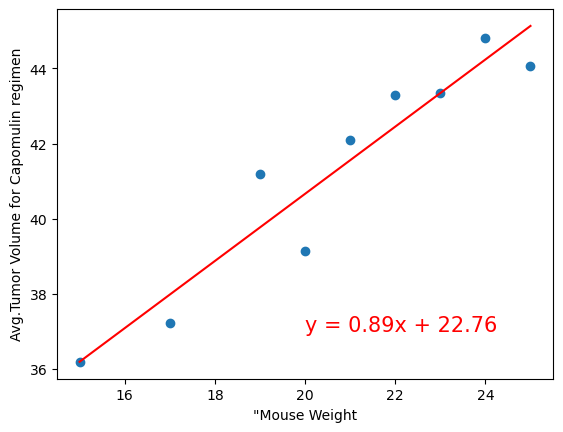

In [20]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_df=clean_data_df.loc[clean_data_df['Drug Regimen']=='Capomulin',["Weight (g)","Tumor Volume (mm3)"]]
capomulin_group_by_weight=capomulin_df.groupby(['Weight (g)']).mean()
capomulin=capomulin_group_by_weight.reset_index()
correlation = st.pearsonr(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")
x_values=capomulin['Weight (g)']
y_values=capomulin['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.xlabel('"Mouse Weight')
plt.ylabel('Avg.Tumor Volume for Capomulin regimen')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,37),fontsize=15,color="red")
